In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from copy import deepcopy
import time
from scipy.signal import argrelmax
import scipy.special as sp
import scipy.sparse as sparse

from Cubic_Newton import Cubic_Newton_NDE

font = {'weight' : 'bold',
        'size'   : 14}

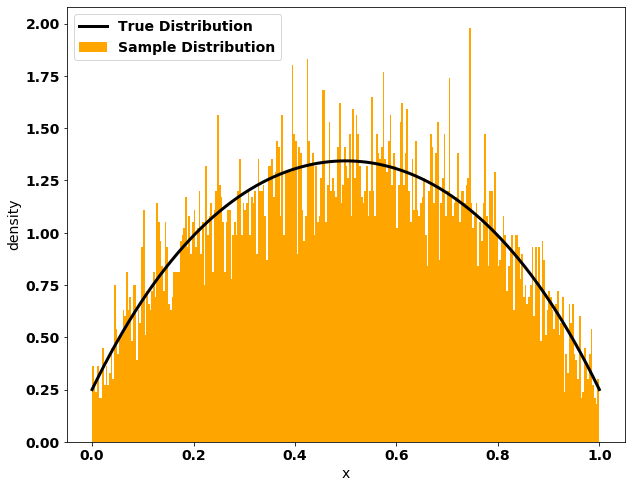

In [2]:

### Simulation: Generate data from beta mixture distribution with M = 5
### For m = 1,...,M
### b_m (x) = ( Gamma(M+1)/ (Gamma(m)*Gamma(M-m+1)) ) * x^{m-1} * (1-x)^{M-m}

n = 10000
N = n
M0 = 5

weights = np.array([0.05, 0.3, 0.3, 0.3, 0.05])

mixture_idx = np.random.choice(M0, size=n, replace=True, p=weights) + 1
samples = np.fromiter((ss.beta.rvs(m, M0-m+1, size=1) for m in mixture_idx),
                   dtype=np.float64)


# Theoretical PDF plotting -- generate the x and y plotting positions
xs = np.linspace(0, 1, 500)
ys = np.zeros_like(xs)

for m_ in range(M0):
    m = m_ + 1
    ys += ss.beta.pdf(xs, a = m, b= M0-m+1) * weights[m_]
    
    
plt.figure(figsize=(10,8))
plt.rc('font', **font)
plt.plot(xs, ys, linewidth = 3, color='black', label='True Distribution')
plt.hist(samples, density=True, bins=300, color='orange', label='Sample Distribution')
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()

In [3]:
# Formulate B
M = 100
rg_M = [m+1 for m in range(M)]
B = np.array([ ss.beta.pdf(samples, m, M-m+1) for m in rg_M ]).transpose()


In [7]:
## use cubic Newton

M_vertices = M
lam0 = (np.ones(M_vertices)/M_vertices) 
S = np.ones(M_vertices)

w, time_cubic, obj_cubic, FW_iters, lam, S = Cubic_Newton_NDE(Bk = B, 
                                                              shape = "concave", 
                                                              S = S, 
                                                              lam = lam0, 
                                                              c = 1,
                                                              max_iter = 50, 
                                                              FW_max_iter = 2000, 
                                                              tol = 2e-8,
                                                              short_steps = 0,
                                                              logout = True)


# np.savetxt("Output_data_concave/M=%d_N=%d_our_time" % (M, N), time_cubic)
# np.savetxt("Output_data_concave/M=%d_N=%d_our_obj" % (M, N), obj_cubic)
# gap_cubic = (obj_cubic - obj_Mosek)/(max(np.abs(obj_Mosek), 1))
# print("gap_cubic=", gap_cubic)


----------------------------------
k= 0  obj= -0.05452880201138865 FW_iters= 285
----------------------------------
k= 1  obj= -0.05731705357274689 FW_iters= 258
----------------------------------
k= 2  obj= -0.05831280584271018 FW_iters= 362
----------------------------------
k= 3  obj= -0.058653838296984236 FW_iters= 183
----------------------------------
k= 4  obj= -0.05869014281522542 FW_iters= 1313
----------------------------------
k= 5  obj= -0.05869175241990385 FW_iters= 233
----------------------------------
k= 6  obj= -0.058691834046307303 FW_iters= 24
----------------------------------
k= 7  obj= -0.05869196256910341 FW_iters= 34
----------------------------------
k= 8  obj= -0.058692007868858594 FW_iters= 16
----------------------------------
k= 9  obj= -0.058692060737497255 FW_iters= 18
----------------------------------
k= 10  obj= -0.058696089601924885 FW_iters= 2000
----------------------------------
k= 11  obj= -0.058696790452810614 FW_iters= 1566
---------------------

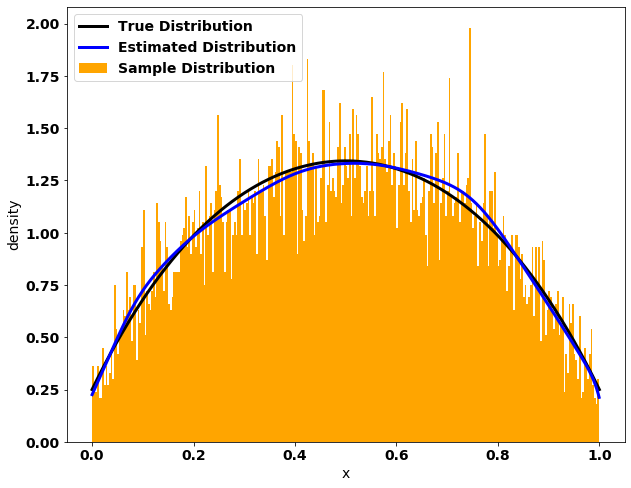

In [8]:

plt.figure(figsize=(10,8))
plt.rc('font', **font)
plt.plot(xs, ys, linewidth = 3, color='black', label='True Distribution')
plt.hist(samples, density=True, bins=300, color='orange', label='Sample Distribution')
g = B.dot(w)
X = samples
plt.plot(X[np.argsort(X)], g[np.argsort(X)], color='blue', linewidth = 3, label='Estimated Distribution')



plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.show()
